# Árboles de Regresión

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../datasets/boston/Boston.csv")
data.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [3]:
data.shape

(506, 14)

In [4]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=5, random_state=0)

In [7]:
regtree.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [8]:
preds = regtree.predict(data[predictors])

In [9]:
data["preds"] = preds

In [10]:
data[["preds", "medv"]]

preds  medv
0    23.787500  24.0
1    23.787500  21.6
2    35.247826  34.7
3    35.247826  33.4
4    35.247826  36.2
..         ...   ...
501  23.787500  22.4
502  23.787500  20.6
503  28.978261  23.9
504  31.170000  22.0
505  23.787500  11.9

[506 rows x 2 columns]

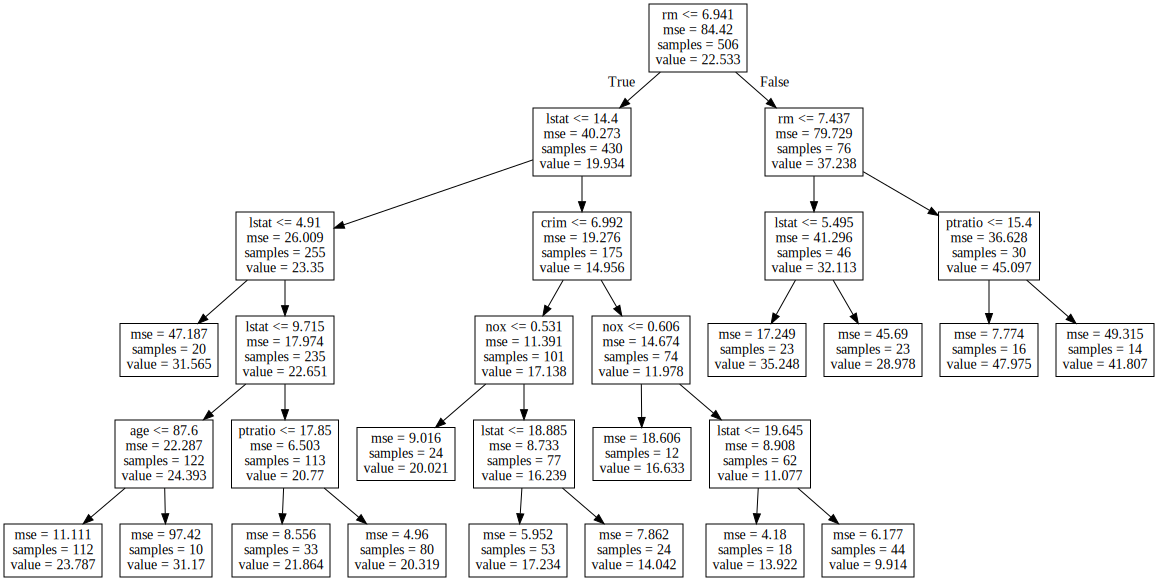

In [11]:
from sklearn.tree import export_graphviz
with open("resources/boston_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
    
import os
from graphviz import Source 
file = open("resources/boston_rtree.dot", "r")
text = file.read()
Source(text)


In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [14]:
cv = KFold(n=X.shape[0], n_folds = 10, shuffle=True, random_state=1)
scores = cross_val_score(regtree, X, Y, scoring="mean_squared_error", cv = cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

TypeError: __init__() got an unexpected keyword argument 'n'

In [ ]:
list(zip(predictors,regtree.feature_importances_))

## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=10000)
forest.fit(X,Y)

In [ ]:
data["rforest_pred"]= forest.oob_prediction_
data[["rforest_pred", "medv"]]

In [ ]:
data["rforest_error2"] = (data["rforest_pred"]-data["medv"])**2
sum(data["rforest_error2"])/len(data)

In [ ]:
forest.oob_score_